<a href="https://colab.research.google.com/github/AdmiralJPJ/ai/blob/main/ML_HW4_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Resources used: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow book by Aurélien Géron, ChatGPT-4o, Google Gemini*

## Applied Machine Learning HW 3 Q1, Group 36, **Jack Tyndall**

In [4]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from transformers import CLIPProcessor, CLIPModel
import torch
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import confusion_matrix


class ClipImageDataset(Dataset):
    def __init__(self, root_dir, condition, categories, processor):
        self.processor = processor
        self.categories = categories
        self.image_paths = []
        self.labels = []

        base_path = os.path.join(root_dir, condition)

        for label_idx, category in enumerate(categories):
            for filename in os.listdir(base_path):
                if (filename.lower().endswith(("jpg", "png", "jpeg"))) and (category in filename.lower()):
                    self.image_paths.append(os.path.join(base_path, filename))
                    self.labels.append(label_idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        path = self.image_paths[idx]
        label = self.labels[idx]

        image = Image.open(path).convert("RGB")

        processed = self.processor(images=image, return_tensors="pt")
        processed["pixel_values"] = processed["pixel_values"].squeeze(0)

        return processed["pixel_values"], label, path

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

categories = ["airplane", "car", "chair", "cup", "dog", "donkey", "duck", "hat"]
conditions = ["realistic", "features", "geons", "silhouettes", "blurred"]

processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

real_dataset = ClipImageDataset(
    root_dir="/content/drive/MyDrive/HW3/v0",
    condition="realistic",
    categories=categories,
    processor=processor
)

feature_dataset = ClipImageDataset(
    root_dir="/content/drive/MyDrive/HW3/v0",
    condition="features",
    categories=categories,
    processor=processor
)

geon_dataset = ClipImageDataset(
    root_dir="/content/drive/MyDrive/HW3/v0",
    condition="geons",
    categories=categories,
    processor=processor
)

sil_dataset = ClipImageDataset(
    root_dir="/content/drive/MyDrive/HW3/v0",
    condition="silhouettes",
    categories=categories,
    processor=processor
)

blur_dataset = ClipImageDataset(
    root_dir="/content/drive/MyDrive/HW3/v0",
    condition="blurred",
    categories=categories,
    processor=processor
)

real_dataloader = DataLoader(real_dataset, batch_size=1, shuffle=False)
feature_dataloader = DataLoader(feature_dataset, batch_size=1, shuffle=False)
geon_dataloader = DataLoader(geon_dataset, batch_size=1, shuffle=False)
sil_dataloader = DataLoader(sil_dataset, batch_size=1, shuffle=False)
blur_dataloader = DataLoader(blur_dataset, batch_size=1, shuffle=False)


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [6]:
# Get model configuration
print(model.config)

# Count total parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")

# Vision encoder details
print("Vision model:", model.vision_model)
print("Number of vision layers:", model.config.vision_config.num_hidden_layers)
print("Hidden size:", model.config.vision_config.hidden_size)
print("Number of attention heads:", model.config.vision_config.num_attention_heads)

# Text encoder details
print("Text model:", model.text_model)
print("Number of text layers:", model.config.text_config.num_hidden_layers)
print("Text hidden size:", model.config.text_config.hidden_size)

# Break down parameters by component
for name, param in model.named_parameters():
    print(f"{name}: {param.shape} = {param.numel():,} parameters")

CLIPConfig {
  "architectures": [
    "CLIPModel"
  ],
  "dtype": "float32",
  "initializer_factor": 1.0,
  "logit_scale_init_value": 2.6592,
  "model_type": "clip",
  "projection_dim": 512,
  "text_config": {
    "attention_dropout": 0.0,
    "bos_token_id": 0,
    "dropout": 0.0,
    "dtype": "float32",
    "eos_token_id": 2,
    "hidden_act": "quick_gelu",
    "hidden_size": 512,
    "initializer_factor": 1.0,
    "initializer_range": 0.02,
    "intermediate_size": 2048,
    "layer_norm_eps": 1e-05,
    "max_position_embeddings": 77,
    "model_type": "clip_text_model",
    "num_attention_heads": 8,
    "num_hidden_layers": 12,
    "projection_dim": 512,
    "vocab_size": 49408
  },
  "transformers_version": "4.57.3",
  "vision_config": {
    "attention_dropout": 0.0,
    "dropout": 0.0,
    "dtype": "float32",
    "hidden_act": "quick_gelu",
    "hidden_size": 768,
    "image_size": 224,
    "initializer_factor": 1.0,
    "initializer_range": 0.02,
    "intermediate_size": 3072,
  

### **HW4Q1 1.**

I have chosen and downloaded the openai/clip-vit-base-patch32. This model uses a Vision Transformer architecture for its image encoder. It has 151,277,313 total parameters spread across two main components, a image encoder (vision model) and a text encoder (text model), both of which use transformer architecture. Both encoders have 12 transformer layers, each of which contain blocks and normalizations.

For the image encoder/vision model, each transformer layer has 7,087,872 parameters, broken down like this:

A Self Attention Block, with four projections (Query, Key, Value, and output projection) each at 590,592 parameters. Each projection has a matrix 768x768 and a bias of 768. This is for the Attention Score calculaiton = Q * K^T. Then attention weights are found by taking the softmax, and then the Output is Attention Weights * V. Query vectors represent "what am I looking for", Key vectors represent "what information do I contain", and Value vectors represent "what actual information should be passed forward".

Layer Normalization 1, 1,536 parameters, 768 weight vector and 768 bias. This layer scales each dimension after normalization, and allows the model to learn the optimal scale for each feature dimension.

Multilayer Perceptron (MLP) Block with two dense fully connected (FC) layers, 2,362,368 (3072x768 weight + 3,072 bias) and 2,360,064 (768x3072 weight + 768 bias) parameters respectively. This projects each token into a higher space, expanding them and creating a richer representation space for complex transformations. Then QuickGELU Activation, and after compression back down.

Layer Normalization 2, 1,536 parameters, 768 weight vector and 768 bias. Same principle as before.

For the text encoder/model, each layer has 3,152,384 parameters:

The self attention block layout, with the four projections, this time at 262,656 parameters per projection with a 512x512 shape and 512 bias.

Layer Normalization 1, 1,024 parameters, 512 vector + 512 bias.

The MLP Block with two FCs, 1,050,624 (2048x512 weights + 2,048 bias) and 1,049,088 (512x2048 weights + 512 bias) respectively.

Layer Normalization 2, 1,024 parameters, 512 vector + 512 bias.



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

model.to(device)
model.eval()

with torch.no_grad():
    text_inputs = processor(
        text=categories,
        return_tensors="pt",
        padding=True
    ).to(device)

    text_features = model.get_text_features(**text_inputs)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

def evaluate_condition(dataloader, condition):
    y_true = []
    y_pred = []

    with torch.no_grad():
        for pixel_values, label, _ in dataloader:
            pixel_values = pixel_values.to(device)

            image_features = model.get_image_features(pixel_values=pixel_values)
            image_features = image_features / image_features.norm(dim=-1, keepdim=True)

            # Cosine similarity
            similarity = image_features @ text_features.T
            prediction = similarity.argmax(dim=-1).item()

            y_true.append(label.item())
            y_pred.append(prediction)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=list(range(len(categories))))

    accuracy = np.mean(np.array(y_true) == np.array(y_pred))

    return cm, accuracy

def plot_confusion_matrix(cm, categories, condition):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=categories,
        yticklabels=categories
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix — {condition}")
    plt.tight_layout()
    plt.show()


Real
Accuracy: 1.0


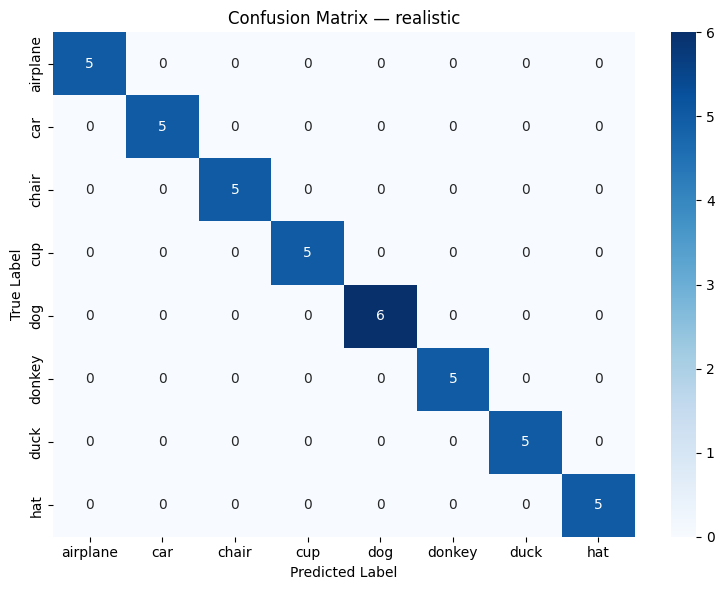


Features
Accuracy: 0.8048780487804879


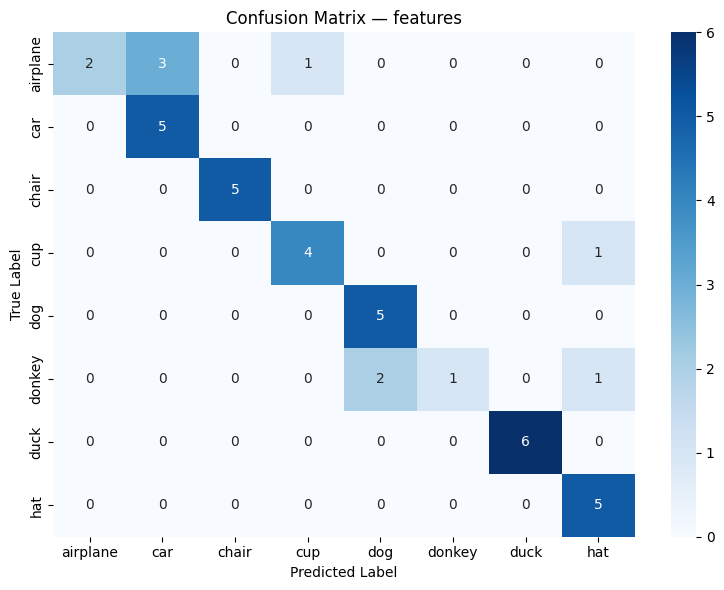


Geons
Accuracy: 0.5333333333333333


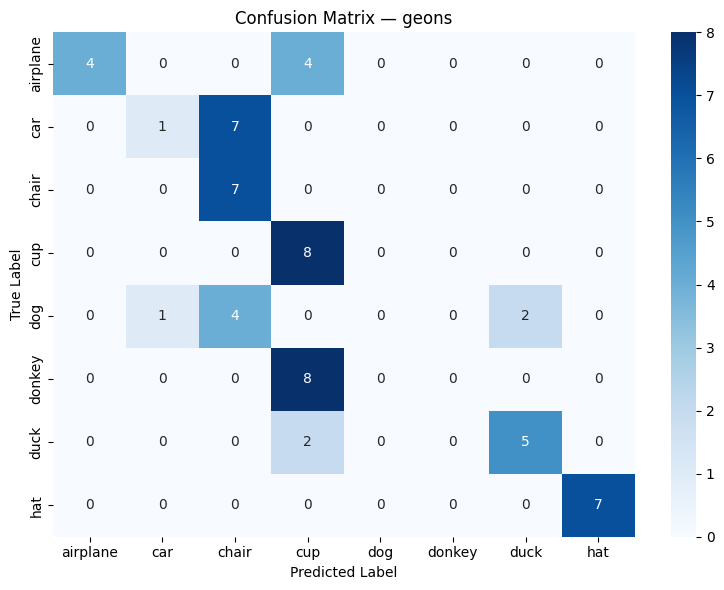


Silhouettes
Accuracy: 0.925


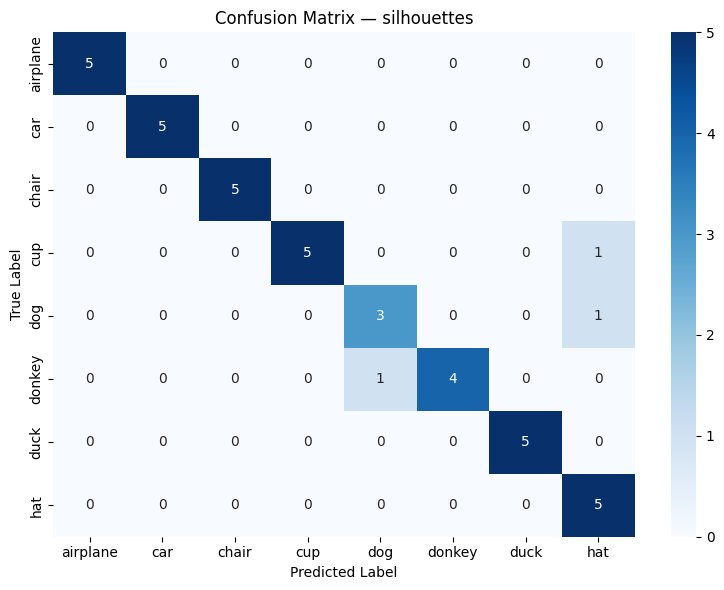


Blurred
Accuracy: 0.6904761904761905


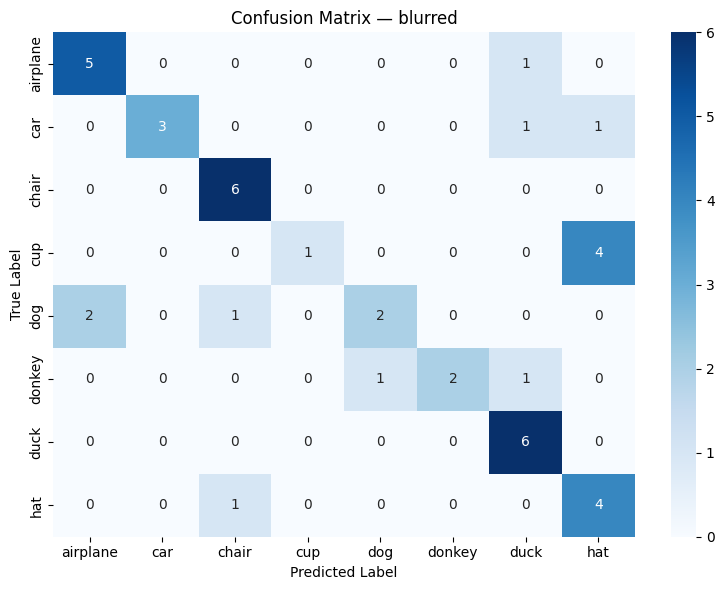

In [13]:
real_cm, real_acc = evaluate_condition(real_dataloader, "realistic")

print("\nReal")
print("Accuracy:", real_acc)
plot_confusion_matrix(cm=real_cm, categories=categories, condition="realistic")

feature_cm, feature_acc = evaluate_condition(feature_dataloader, "features")

print("\nFeatures")
print("Accuracy:", feature_acc)
plot_confusion_matrix(cm=feature_cm, categories=categories, condition="features")

geon_cm, geon_acc = evaluate_condition(geon_dataloader, "geons")

print("\nGeons")
print("Accuracy:", geon_acc)
plot_confusion_matrix(cm=geon_cm, categories=categories, condition="geons")

sil_cm, sil_acc = evaluate_condition(sil_dataloader, "silhouettes")

print("\nSilhouettes")
print("Accuracy:", sil_acc)
plot_confusion_matrix(cm=sil_cm, categories=categories, condition="silhouettes")

blur_cm, blur_acc = evaluate_condition(blur_dataloader, "blurred")

print("\nBlurred")
print("Accuracy:", blur_acc)
plot_confusion_matrix(cm=blur_cm, categories=categories, condition="blurred")





### **HW4Q1 Baby vs. Machine**

Baby vs. Machine

Real: 85% vs. 100% - Machine Win
Silhouettes: 78% vs. 92.5% - Machine Win
Geons: 59% vs. 53% - Baby Win
Blurred: 57% vs. 69% - Machine Win
Features: 56% vs. 80% - Machine Win